# 지도 학습 - Classification

In [2]:
# 필요한 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc, cm
import matplotlib as mpl

# 마이너스 깨짐 현상 해결하기
mpl.rcParams['axes.unicode_minus'] = False
# 한글 폰트 지정
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 준비

In [3]:
## titanic 데이터 ##
# 파일 경로 설정
file_path = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# csv를 DF로 가져오기
raw = pd.read_csv(file_path, index_col=0)

In [4]:
titanic = raw.copy()
print(titanic.shape)
titanic.head(2)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
# 컬럼별 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

**결측치**
1. Age : 177 (애매하게 결측치가 있어서 대체를 해줘야 할 듯 함.)
2. Cabin : 687 (결측치가 가장 많음. 필요하지 않은 데이터이면 삭제해도 괜찮을 것 같음.)
3. Embarked : 2 ==> 최빈값으로 대체해줘도 괜찮을 것 같음.

In [7]:
# 요약 통계량 확인
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 데이터 처리

### Cabin

In [8]:
titanic.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

결측치가 너무 많아 삭제

In [9]:
# EDA용 DF를 만든다.
titanic_eda = titanic.drop(columns='Cabin')

print(titanic_eda.shape)
titanic_eda.head(2)

(891, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


### Embarked

In [10]:
# 빈도수 확인
titanic_eda.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

S : 가장 많이 존재 >> 이걸로 결측치를 대체할 것임.

In [11]:
# 최빈값으로 결측치 대체하기
titanic_eda['Embarked'] = titanic_eda.Embarked.fillna('S')
titanic_eda.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

### AGE

In [12]:
# age의 요약 통계량 확인
titanic_eda.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

0 ~ 80세까지 존재

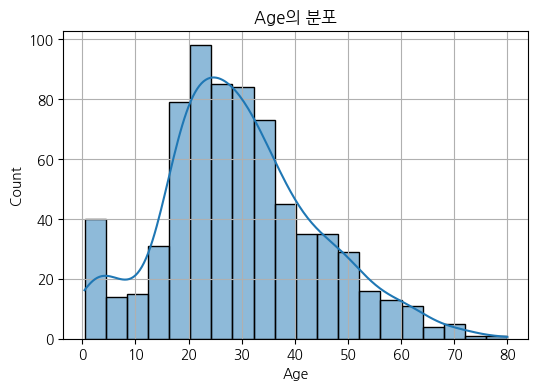

In [13]:
# age의 히스토그램 확인
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_eda.dropna().Age, kde=True)

plt.title('Age의 분포')

plt.grid()
plt.show()

1. 평균으로 대체할지, 중앙값으로 대체할지 생각해볼 필요가 있음.
2. AGE가 결측치가 아닌 데이터 확인하기
    * 다른 데이터와 age와의 관계 확인

In [14]:
# age가 notnull인 DF
titanic_eda_notnull = titanic_eda[titanic_eda.Age.notnull()]
print(titanic_eda_notnull.shape)
titanic_eda_notnull.head(2)

(714, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [15]:
titanic_eda_notnull.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [16]:
titanic_eda_notnull.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

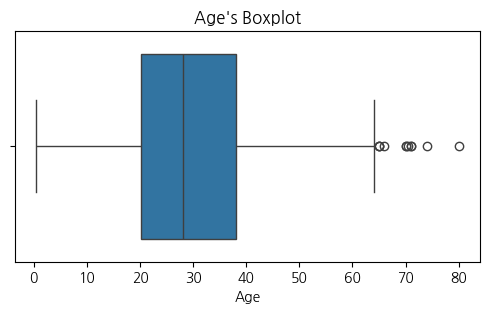

In [19]:
# boxplot 확인
plt.figure(figsize=(6, 3))
sns.boxplot(data=titanic_eda_notnull.Age, orient='h')
plt.title("Age's Boxplot")
plt.show()

1. 20, 30, 40대.. 이렇게 나타내도 좋을 것 같다.
2. 사분위수 개수 확인 후, 나눠줘도 괜찮을 듯함.
    * 중앙값, 범위 안의 값, 밖의 값 (세등분)

In [26]:
# 범주형 데이터로 바꾸기
# 컬럼명 : Age_range
# 10대, 20대..
def age_range(n):
    if n >= 80:
        return 8
    elif n >= 70:
        return 7
    elif n >= 60:
        return 6
    elif n >= 50:
        return 5
    elif n >= 40:
        return 4
    elif n >= 30:
        return 3
    elif n >= 20:
        return 2
    elif n >= 10:
        return 1
    else:
        return 0

# 범주형 데이터로 바꾸기
# 컬럼명 : Age_quantile
def age_quantile(n):
    Q2 = titanic_eda_notnull.Age.median()
    Q3 = titanic_eda_notnull.Age.quantile(0.75)
    Q1 = titanic_eda_notnull.Age.quantile(0.25)
    IQR = Q3 - Q1
    # 이상치 시작 범위
    upper_bound = Q3 + 1.5 * IQR
    
    if n <= Q2:
        return 0
    elif n > Q2 and n <= upper_bound:
        return 1
    else:
        return 2

In [27]:
# 새로운 컬럼 만들기
titanic_eda_notnull['Age_range'] = titanic_eda_notnull.Age.apply(age_range)
titanic_eda_notnull['Age_quantile'] = titanic_eda_notnull.Age.apply(age_quantile)

titanic_eda_notnull.columns

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\1153797689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Age_range'] = titanic_eda_notnull.Age.apply(age_range)
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\1153797689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Age_quantile'] = titanic_eda_notnull.Age.apply(age_quantile)


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Age_range', 'Age_quantile'],
      dtype='object')

In [28]:
# Age 컬럼은 drop하기 - 일단 삭제하지 않을 것
# titanic_eda_notnull = titanic_eda_notnull.drop(columns='Age')

titanic_eda_notnull.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Age_range       0
Age_quantile    0
dtype: int64

결측치가 없는 것으로 확인해도 좋을 것 같음.
* Age 결측치 DF를 test 데이터로 써도 좋을 것 같다. 연령대 예측하는 회귀 모델 만들기로 !

이제는 다른 데이터도 확인해보자 !

### Ticket

In [29]:
titanic_eda_notnull.Ticket # 티겟 넘버 ==> 예측에 필요없다고 판단 (제거 해도 될 것 같다 !)

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
886              382652
887              211536
888              112053
890              111369
891              370376
Name: Ticket, Length: 714, dtype: object

In [30]:
titanic_eda_notnull.drop(columns='Ticket', inplace=True)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\1700914566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull.drop(columns='Ticket', inplace=True)


### Name

In [31]:
titanic_eda_notnull.Name # 이름과 성별 확인하기
# 'Name' 컬럼은 상관없을 것 같다. >> 삭제

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
886                 Rice, Mrs. William (Margaret Norton)
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 714, dtype: object

In [56]:
# 이름의 중간 단어가 성별을 나타내는 것이다. >> 'Sex'와 비교해보아도 좋을 듯함.
# titanic_eda_notnull['Name_sex'] = titanic_eda_notnull.Name.apply(lambda x : x.split(' ')[1].strip('.'))

In [32]:
titanic_eda_notnull.drop(columns='Name', inplace=True)
titanic_eda_notnull.columns

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\359655718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull.drop(columns='Name', inplace=True)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_range', 'Age_quantile'],
      dtype='object')

### SibSp / Parch
* Sibsp : 형제자매 + 배우자
* Parch : 부모 + 자식
* ==> 동승자 처리 해주기 (더해서 0이면 동승자 없)

In [33]:
# 동승자수 컬럼
titanic_eda_notnull['Together_num'] = titanic_eda_notnull.SibSp + titanic_eda_notnull.Parch

# 동승자 있나(1) 없나(0) 처리
titanic_eda_notnull['Together'] = titanic_eda_notnull.Together_num.apply(lambda x : 0 if x == 0 else 1)
titanic_eda_notnull.head(2)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\2290624086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Together_num'] = titanic_eda_notnull.SibSp + titanic_eda_notnull.Parch
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\2290624086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Together'] = titanic_eda_notnull.Together_num.apply(lambda x : 0 if x == 0 else 1)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_range,Age_quantile,Together_num,Together
PassengerId,,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,2,0,1,1
2,1,1,female,38.0,1,0,71.2833,C,3,1,1,1


### Fare

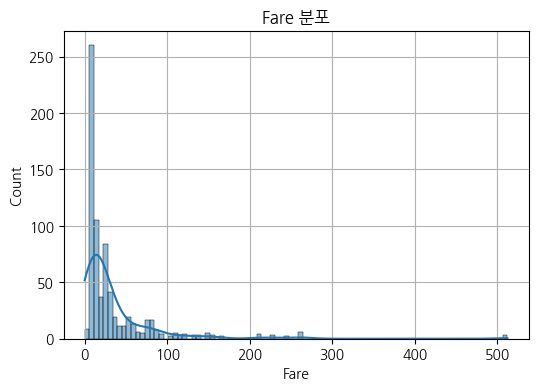

In [34]:
# 히스토그램으로 분포 확인
plt.figure(figsize=(6, 4))
sns.histplot(data=titanic_eda_notnull.Fare, kde=True)
plt.title('Fare 분포')
plt.grid()
plt.show()

스케일링 필요함. ==> **StandardScaling**

In [35]:
titanic_eda_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      714 non-null    int64  
 1   Pclass        714 non-null    int64  
 2   Sex           714 non-null    object 
 3   Age           714 non-null    float64
 4   SibSp         714 non-null    int64  
 5   Parch         714 non-null    int64  
 6   Fare          714 non-null    float64
 7   Embarked      714 non-null    object 
 8   Age_range     714 non-null    int64  
 9   Age_quantile  714 non-null    int64  
 10  Together_num  714 non-null    int64  
 11  Together      714 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 72.5+ KB


In [36]:
# Fare 스케일링하기 >> Standardscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_eda_notnull[['Fare_scaled']] = scaler.fit_transform(titanic_eda_notnull[['Fare']])

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\2957310817.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull[['Fare_scaled']] = scaler.fit_transform(titanic_eda_notnull[['Fare']])


In [37]:
titanic_eda_notnull.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_range', 'Age_quantile', 'Together_num', 'Together',
       'Fare_scaled'],
      dtype='object')

### Sex, Embarked
* 라벨인코딩

In [38]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

titanic_eda_notnull['Sex_label'] = encoder.fit_transform(titanic_eda_notnull.Sex)
titanic_eda_notnull['Embarked_label'] = encoder.fit_transform(titanic_eda_notnull.Embarked)

C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\49020360.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Sex_label'] = encoder.fit_transform(titanic_eda_notnull.Sex)
C:\Users\tjdtn\AppData\Local\Temp\ipykernel_1260\49020360.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_eda_notnull['Embarked_label'] = encoder.fit_transform(titanic_eda_notnull.Embarked)


In [39]:
# 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

# 희소행렬
onehot_Sex = encoder.fit_transform(titanic_eda_notnull[['Sex']])
# 밀집행렬로 바꾸어서 DF로 만들어주기
onehot_Sex_df = pd.DataFrame(data=onehot_Sex.todense(), columns=encoder.get_feature_names_out())

# 희소행렬
onehot_Embarked = encoder.fit_transform(titanic_eda_notnull[['Embarked']])
# 밀집행렬로 바꾸어서 DF로 만들어주기
onehot_Embarked_df = pd.DataFrame(data=onehot_Embarked.todense(), columns=encoder.get_feature_names_out())

# 'titanic_eda_notnull'에 추가
titanic_eda_notnull_final = pd.concat([titanic_eda_notnull.reset_index(drop=True), onehot_Sex_df, onehot_Embarked_df], axis=1)

In [40]:
titanic_eda_notnull_final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Age_range', 'Age_quantile', 'Together_num', 'Together',
       'Fare_scaled', 'Sex_label', 'Embarked_label', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

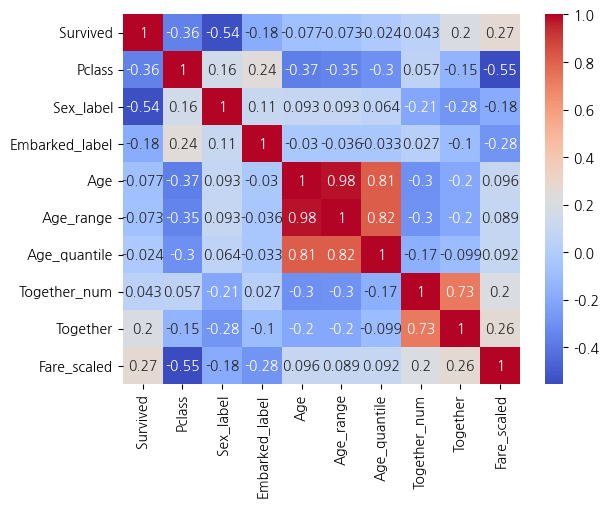

In [41]:
# 변수들간의 상관관계 분석
features = ['Survived', 'Pclass', 'Sex_label', 'Embarked_label', 'Age', 'Age_range', 'Age_quantile', 'Together_num', 'Together', 'Fare_scaled']

sns.heatmap(data=titanic_eda_notnull_final[features].corr(), annot=True, cmap='coolwarm')
plt.show()

## 모델링
* 생존여부 예측하기 - 분류 분석

In [42]:
## 분석 데이터 준비
# 독립변수 - 라벨인코딩
X_label = titanic_eda_notnull_final[['Pclass', 'Sex_label', 'Embarked_label', 'Together', 'Fare_scaled']]
# 독립변수 - 원핫인코딩
X_onehot = titanic_eda_notnull_final[['Pclass', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_scaled', 'Together']]
# 종속변수
y = titanic_eda_notnull_final.Survived

# training / test data
from sklearn.model_selection import train_test_split

# 라벨인코딩
X_label_train, X_label_test, y_train, y_test = \
train_test_split(X_label, y, test_size=0.25, random_state=42)

# 원핫인코딩
X_onehot_train, X_onehot_test, y_train, y_test = \
train_test_split(X_onehot, y, test_size=0.25, random_state=42)

print(X_label_train.shape, y_train.shape, X_label_test.shape, y_test.shape)
print(X_onehot_train.shape, y_train.shape, X_onehot_test.shape, y_test.shape)

(535, 5) (535,) (179, 5) (179,)
(535, 8) (535,) (179, 8) (179,)


In [45]:
# 모델 생성 - 의사결정나무
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,
                            max_features=3,
                            random_state=42)
# 라벨인코딩
dt.fit(X_label_train, y_train)

y_train_pred = dt.predict(X_label_train)
y_test_pred = dt.predict(X_label_test)

# 성능 평가
# MAE, MSE, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# 원핫
dt.fit(X_onehot_train, y_train)

y_train_pred = dt.predict(X_onehot_train)
y_test_pred = dt.predict(X_onehot_test)

# 성능 평가
# MAE, MSE, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 82.43%
ACCURACY SCORE - TEST DATA
>> 81.01%
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       107
           1       0.93      0.57      0.71        72

    accuracy                           0.81       179
   macro avg       0.85      0.77      0.78       179
weighted avg       0.84      0.81      0.80       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 81.12%
ACCURACY SCORE - TEST DATA
>> 76.54%
              precision    recall  f1-score   support

           0       0.75      0.92      0.82       107
           1       0.81      0.54      0.65        72

    accuracy                           0.77       179
   macro avg       0.78      0.73      0.74       179
weighted avg       0.77      0.77      0.75       179



In [46]:
# 모델 생성 - 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=5,
                            max_features=3,
                            n_jobs=-1,
                            random_state=42)
# fitting - 라벨인코딩
rf.fit(X_label_train, y_train)

# predict
y_train_pred = rf.predict(X_label_train)
y_test_pred = rf.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
rf.fit(X_onehot_train, y_train)

# predict
y_train_pred = rf.predict(X_onehot_train)
y_test_pred = rf.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 84.11%
ACCURACY SCORE - TEST DATA
>> 77.65%
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       107
           1       0.79      0.61      0.69        72

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 83.36%
ACCURACY SCORE - TEST DATA
>> 77.09%
              precision    recall  f1-score   support

           0       0.77      0.89      0.82       107
           1       0.78      0.60      0.68        72

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



In [47]:
# 모델 생성 - 서포트 벡터 머신
from sklearn.svm import SVC

svc = SVC(kernel='linear',
          random_state=42)

# fitting - 라벨인코딩
svc.fit(X_label_train, y_train)

# 예측
y_train_pred = svc.predict(X_label_train)
y_test_pred = svc.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
svc.fit(X_onehot_train, y_train)

# 예측
y_train_pred = svc.predict(X_onehot_train)
y_test_pred = svc.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 78.69%
ACCURACY SCORE - TEST DATA
>> 75.98%
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.72      0.67      0.69        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 78.69%
ACCURACY SCORE - TEST DATA
>> 75.98%
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.72      0.67      0.69        72

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.76      0.76       179



**Gradient Boosting Machine**
* AdaBoost와 학습 방법과 비슷하다.
* 경사하강법을 이용해 가중치를 업데이트하며 머신러닝을 수행한다.
* 분류 뿐만 아니라 회귀도 수행 가능하다.
* 과적합 규제 기능이 없다는 단점이 있다.

AdaBoost 학습과정
* 오류 데이터에 가중치를 부여해 다음 학습에서 오류 데이터를 더 잘 분류할 수 있도록 한다.

경사하강법
* 기울기를 줄여나감으로써 오류를 최소화하는 방법이다.
    * 미분값이 감소하는 방향으로 파라미터를 조정한다.
    * 미분값이 더 이상 감소하지 않는 지점을 비용함수가 최소(0)인 지점으로 간주하고 그때의 파라미터를 반환한다.
    * ==> 경사 = 기울기 = 비용함수의 미분계수 = 0 인 지점을 찾는 과정

하이퍼 파라미터
* loss : 경사하강법에서 사용할 비용함수를 지정한다.
* learning_rate : GBM이 학습을 진행할 때마다 적용하는 학습률. 약한 학습기가 순차적으로 오류값을 보정해 나가는데 적용하는 계수 (0 ~ 1)
* n_estimators : 약한 학습기의 개수
* subsample : 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율
* 트리 기반 자체의 파라미터도 지정 가능하다.

In [56]:
# 모델 생성 - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

grm = GradientBoostingClassifier(learning_rate=0.1,
                                 n_estimators=200,
                                 max_depth=5,
                                 max_features=5,
                                 random_state=42)
# fitting - 라벨인코딩
grm.fit(X_label_train, y_train)

# predict
y_train_pred = grm.predict(X_label_train)
y_test_pred = grm.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
grm.fit(X_onehot_train, y_train)

# predict
y_train_pred = grm.predict(X_onehot_train)
y_test_pred = grm.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 92.15%
ACCURACY SCORE - TEST DATA
>> 82.12%
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       107
           1       0.81      0.72      0.76        72

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 92.15%
ACCURACY SCORE - TEST DATA
>> 81.56%
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       107
           1       0.81      0.71      0.76        72

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [57]:
# 모델 생성 - KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2,
                           n_jobs=-1)
# fitting - 라벨인코딩
knn.fit(X_label_train, y_train)

# predict
y_train_pred = knn.predict(X_label_train)
y_test_pred = knn.predict(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

# fitting - 원핫인코딩
knn.fit(X_onehot_train, y_train)

# predict
y_train_pred = knn.predict(X_onehot_train)
y_test_pred = knn.predict(X_onehot_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

print('='*7, 'OneHotEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
# print('F1 SCORE : {:.4f}'.format(f1_score(y_test, y_test_pred)))
# print(f'CONFUSION MATRIX\n{confusion_matrix(y_test, y_test_pred)}')
print(classification_report(y_test, y_test_pred))

======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 84.86%
ACCURACY SCORE - TEST DATA
>> 78.21%
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       107
           1       0.87      0.54      0.67        72

    accuracy                           0.78       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.78      0.77       179

======= OneHotEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 84.49%
ACCURACY SCORE - TEST DATA
>> 78.21%
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       107
           1       0.87      0.54      0.67        72

    accuracy                           0.78       179
   macro avg       0.81      0.74      0.75       179
weighted avg       0.80      0.78      0.77       179



In [60]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=1000,
                    learning_rate=0.1,
                    max_depth=5,
                    early_stopping_rounds=50,
                    eval_metric='auc')

# 라벨 인코딩
xgb.fit(X_label_train, y_train,
        eval_set=[(X_label_test, y_test)],
        verbose=10)

# predict
y_train_pred = xgb.predict(X_label_train)
y_test_pred = xgb.predict(X_label_test)
y_test_pred_proba = xgb.predict_proba(X_label_test)

# 성능평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_auc_score

print('='*7, 'LabelEncoding', '='*7)
print('ACCURACY SCORE - TRAIN DATA\n>> {:.2f}%'.format(accuracy_score(y_train, y_train_pred)*100))
print('ACCURACY SCORE - TEST DATA\n>> {:.2f}%'.format(accuracy_score(y_test, y_test_pred)*100))
print('ROC-AUC SCORE\n>> {:.4f}'.format(roc_auc_score(y_test, y_test_pred_proba[:, 1])))
print(classification_report(y_test, y_test_pred))

[0]	validation_0-auc:0.80919
[10]	validation_0-auc:0.83158
[20]	validation_0-auc:0.83242
[30]	validation_0-auc:0.83048
[40]	validation_0-auc:0.83281
[50]	validation_0-auc:0.84424
[60]	validation_0-auc:0.84670
[70]	validation_0-auc:0.84683
[80]	validation_0-auc:0.84722
[90]	validation_0-auc:0.84904
[100]	validation_0-auc:0.85079
[110]	validation_0-auc:0.85092
[120]	validation_0-auc:0.85073
[130]	validation_0-auc:0.84982
[140]	validation_0-auc:0.85060
[150]	validation_0-auc:0.85034
[160]	validation_0-auc:0.85021
[163]	validation_0-auc:0.85086
======= LabelEncoding =======
ACCURACY SCORE - TRAIN DATA
>> 87.48%
ACCURACY SCORE - TEST DATA
>> 80.45%
ROC-AUC SCORE
>> 0.8518
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       107
           1       0.80      0.68      0.74        72

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       17